# ⚖ Nutrition Paradox: A Global View on Obesity and Malnutrition 

# Data Onboarding

In [1]:
# Import Datas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import requests
import plotly.express as px
import plotly.graph_objects as go

In [2]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"

result = requests.get(url)

data1 = result.json()

In [4]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"

result = requests.get(url)

data2 = result.json()

In [5]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"

result = requests.get(url)

data3 = result.json()

In [6]:
url = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

result = requests.get(url)

data4 = result.json()

In [11]:
data1.keys()

dict_keys(['@odata.context', 'value'])

In [13]:
# Load DataFrame

In [15]:
df1 = pd.DataFrame(data1['value'])
df2 = pd.DataFrame(data2['value'])
df3 = pd.DataFrame(data3['value'])
df4 = pd.DataFrame(data4['value'])

In [16]:
# Add Age Column

In [17]:
df1['age_group'] = "adults"
df2['age_group'] = "children"
df3['age_group'] = "adults"
df4['age_group'] = "children"

In [18]:
# Concat DataFrames 

In [23]:
df_obesity = pd.concat([df1,df2]).reset_index(drop=True)

In [24]:
df_obesity.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,257,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,2001,SEX_BTSX,...,1.0 [0.8-1.3],0.98170,0.75674,1.27487,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adults
1,349,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adults


In [27]:
df_malnutrition = pd.concat([df3,df4]).reset_index(drop=True)

In [28]:
df_malnutrition.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,5.8 [4.0-8.1],5.79511,3.97204,8.07702,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,adults
1,404,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,0.9 [0.4-1.9],0.93657,0.36515,1.85929,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,adults


In [31]:
# Filter dataset to include only records from the years 2012 to 2022 : 

In [33]:
df_obesity = df_obesity[df_obesity['TimeDim'].between(2012,2022)]
df_malnutrition = df_malnutrition[df_malnutrition['TimeDim'].between(2012,2022)]

In [35]:
df_obesity.head(2)

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
1,349,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,17.5 [15.8-19.2],17.48764,15.79378,19.24573,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adults
8,4742,NCD_BMI_30C,COUNTRY,IRQ,EMR,YEAR,Eastern Mediterranean,SEX,2020,SEX_MLE,...,28.3 [23.1-33.8],28.33553,23.08959,33.81534,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,adults


# Data Cleaning & Feature Engineering

In [38]:
# Drop Unwanted Columns :

In [40]:
df_obesity.drop(['Id', 'IndicatorCode', 'SpatialDimType','ParentLocationCode', 'TimeDimType', 'Dim1Type',
                  'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 'Value','Comments', 'Date', 
                  'TimeDimensionValue', 'TimeDimensionBegin','TimeDimensionEnd'], axis = 1,inplace=True)

In [42]:
df_malnutrition.drop(['Id', 'IndicatorCode', 'SpatialDimType','TimeDimType','ParentLocationCode', 'Dim1Type','Dim2Type',
                      'Dim2', 'Dim3Type', 'Dim3', 'DataSourceDimType','DataSourceDim', 'Value','Comments',
                      'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd'], axis = 1,inplace=True)

In [44]:
df_obesity.head(2)

,SpatialDim,ParentLocation,TimeDim,Dim1,NumericValue,Low,High,age_group
1,IRN,Eastern Mediterranean,2020,SEX_MLE,17.48764,15.79378,19.24573,adults
8,IRQ,Eastern Mediterranean,2020,SEX_MLE,28.33553,23.08959,33.81534,adults


In [46]:
df_malnutrition.head(2)

,SpatialDim,ParentLocation,Dim1,TimeDim,NumericValue,Low,High,age_group
0,GAB,Africa,SEX_FMLE,2021,5.79511,3.97204,8.07702,adults
4,MNG,Western Pacific,SEX_BTSX,2017,3.09065,2.42823,3.84215,adults


In [48]:
# Rename column names :

In [50]:
df_obesity = df_obesity.rename( columns = { 'TimeDim' : "Year", "Dim1" : "Gender" ,
                                            "NumericValue" : "Mean_Estimate", "Low" : "LowerBound", "High" : "UpperBound", 
                                            "ParentLocation" : "Region", "SpatialDim" : "Country"  })

In [52]:
df_malnutrition = df_malnutrition.rename( columns = { 'TimeDim' : "Year", "Dim1" : "Gender",
                                                     "NumericValue" : "Mean_Estimate", "Low" : "LowerBound", "High" : "UpperBound",
                                                     "ParentLocation" : "Region", "SpatialDim" : "Country"  })

In [54]:
# Rename Gender column names :

In [56]:
df_obesity['Gender'] = df_obesity['Gender'].replace( { 'SEX_MLE' : "Male", "SEX_FMLE" : "Female", "SEX_BTSX" : "Both" })

In [58]:
df_malnutrition['Gender'] = df_malnutrition['Gender'].replace( { 'SEX_MLE' : "Male", "SEX_FMLE" : "Female", "SEX_BTSX" : "Both" })

In [60]:
# Convert Country Codes to Full Names using pycountry: 

In [62]:
special_cases = { 
    'GLOBAL': 'Global', 
    'WB_LMI': 'Low & Middle Income', 
    'WB_HI': 'High Income', 
    'WB_LI': 'Low Income', 
    'EMR': 'Eastern Mediterranean Region', 
    'EUR': 'Europe', 
    'AFR': 'Africa', 
    'SEAR': 'South-East Asia Region', 
    'WPR': 'Western Pacific Region', 
    'AMR': 'Americas Region', 
    'WB_UMI': 'Upper Middle Income'} 


def get_country_name(alpha3):
    if alpha3 in special_cases:
        return special_cases[alpha3]
    try:
        return pycountry.countries.get(alpha_3 = alpha3).name
    except:
        return None

df_obesity["Country"] = df_obesity["Country"].apply(get_country_name)

In [64]:
special_cases = { 
    'GLOBAL': 'Global', 
    'WB_LMI': 'Low & Middle Income', 
    'WB_HI': 'High Income', 
    'WB_LI': 'Low Income', 
    'EMR': 'Eastern Mediterranean Region', 
    'EUR': 'Europe', 
    'AFR': 'Africa', 
    'SEAR': 'South-East Asia Region', 
    'WPR': 'Western Pacific Region', 
    'AMR': 'Americas Region', 
    'WB_UMI': 'Upper Middle Income'} 

def get_country_name(alpha3):
    if alpha3 in special_cases:
        return special_cases[alpha3]
    try:
        return pycountry.countries.get(alpha_3 = alpha3).name
    except:
        return None

df_malnutrition["Country"] = df_malnutrition["Country"].apply(get_country_name)

In [66]:
# New Columns to Create: 

In [68]:
df_obesity['CI_Width'] = df_obesity["UpperBound"] - df_obesity["LowerBound"]
df_malnutrition['CI_Width'] = df_malnutrition["UpperBound"] - df_malnutrition["LowerBound"]

In [70]:
# obesity_level (for the obesity table only) : 
# Categorize obesity levels based on NumericValue : 

In [72]:
df_obesity['obesity_level'] = df_obesity['Mean_Estimate']

In [74]:
def obesity_level(Mean_Estimate):
    if Mean_Estimate >= 30:
        return ("High")
    elif Mean_Estimate>=25 and Mean_Estimate<=29.9:
        return ("Moderate")
    else:
        return ("Low")

df_obesity['obesity_level'] = df_obesity['obesity_level'].apply(obesity_level)

In [76]:
# malnutrition_level (for the malnutrition table only): 
# Categorize malnutrition levels based on NumericValue: 

In [78]:
df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate']

In [80]:
def malnutrition_level(Mean_Estimate):
    if Mean_Estimate >= 20:
        return ("High")
    elif Mean_Estimate>=10 and Mean_Estimate<=19.9:
        return ("Moderate")
    else:
        return ("Low")

df_malnutrition['malnutrition_level'] = df_malnutrition['malnutrition_level'].apply(malnutrition_level)

In [82]:
df_obesity.head(2)

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,obesity_level
1,"Iran, Islamic Republic of",Eastern Mediterranean,2020,Male,17.48764,15.79378,19.24573,adults,3.45195,Low
8,Iraq,Eastern Mediterranean,2020,Male,28.33553,23.08959,33.81534,adults,10.72575,Moderate


In [84]:
df_malnutrition.head(2)

,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,malnutrition_level
0,Gabon,Africa,Female,2021,5.79511,3.97204,8.07702,adults,4.10498,Low
4,Mongolia,Western Pacific,Both,2017,3.09065,2.42823,3.84215,adults,1.41392,Low


# Exploratory Data Analysis (EDA) with Python 

In [87]:
df_obesity.shape

(27720, 10)

In [89]:
df_malnutrition.shape

(27720, 10)

In [91]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 1 to 83154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        27720 non-null  object 
 1   Region         26268 non-null  object 
 2   Year           27720 non-null  int64  
 3   Gender         27720 non-null  object 
 4   Mean_Estimate  27720 non-null  float64
 5   LowerBound     27720 non-null  float64
 6   UpperBound     27720 non-null  float64
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [93]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27720 entries, 0 to 83159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             27720 non-null  object 
 1   Region              26268 non-null  object 
 2   Gender              27720 non-null  object 
 3   Year                27720 non-null  int64  
 4   Mean_Estimate       27720 non-null  float64
 5   LowerBound          27720 non-null  float64
 6   UpperBound          27720 non-null  float64
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   malnutrition_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [95]:
df_obesity.describe()

,Year,Mean_Estimate,LowerBound,UpperBound,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,12.761041,9.393155,17.068489,7.675334
std,3.162335,10.858925,9.893854,12.395013,6.616899
min,2012.000000,0.265670,0.077540,0.547850,0.216700
25%,2014.000000,4.753960,2.354430,7.875503,2.926715
50%,2017.000000,9.944540,6.506535,13.704380,5.480535
75%,2020.000000,17.482418,12.697755,23.986050,10.338880
max,2022.000000,80.609250,74.365370,87.868510,40.554060


In [97]:
df_malnutrition.describe()

,Year,Mean_Estimate,LowerBound,UpperBound,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,5.354451,3.397094,8.147889,4.750795
std,3.162335,4.811220,3.908061,6.443692,4.257684
min,2012.000000,0.175310,0.023700,0.354830,0.166680
25%,2014.000000,2.039283,1.053662,3.143305,1.603222
50%,2017.000000,3.597790,1.907975,6.095555,3.351095
75%,2020.000000,7.335245,4.186443,11.526302,6.530875
max,2022.000000,35.894110,31.365400,43.680290,26.701740


### Missing Values for obesity

In [100]:
df_obesity.isnull().sum()

Country             0
Region           1452
Year                0
Gender              0
Mean_Estimate       0
LowerBound          0
UpperBound          0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

In [102]:
# Handling Missing Values

In [104]:
df_obesity["Region"].mode()

0    Europe
Name: Region, dtype: object

In [106]:
df_obesity.loc[df_obesity["Country"] == "Eastern Mediterranean Region","Region"] = 'Eastern Mediterranean'
df_obesity.loc[df_obesity["Country"] == "Europe","Region"] = 'Europe'
df_obesity.loc[df_obesity["Country"] == "Americas Region","Region"] = 'Americas'
df_obesity.loc[df_obesity["Country"] == "South-East Asia Region","Region"] = 'South-East Asia'
df_obesity.loc[df_obesity["Country"] == "Western Pacific Region","Region"] = 'Western Pacific'
df_obesity.loc[df_obesity["Country"] == "Africa","Region"] = 'Africa'

In [108]:
df_obesity["Region"].fillna("Europe",inplace = True)

C:\Users\91968\AppData\Local\Temp\ipykernel_16500\2446503511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_obesity["Region"].fillna("Europe",inplace = True)


In [110]:
df_obesity.isnull().sum()

Country          0
Region           0
Year             0
Gender           0
Mean_Estimate    0
LowerBound       0
UpperBound       0
age_group        0
CI_Width         0
obesity_level    0
dtype: int64

### Missing Values for malnutrition

In [113]:
df_malnutrition.isnull().sum()

Country                  0
Region                1452
Gender                   0
Year                     0
Mean_Estimate            0
LowerBound               0
UpperBound               0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64

In [115]:
# Handling Missing Values

In [117]:
df_malnutrition["Region"].mode()

0    Europe
Name: Region, dtype: object

In [119]:
df_malnutrition.loc[df_malnutrition["Country"] == "Eastern Mediterranean Region","Region"] = 'Eastern Mediterranean'
df_malnutrition.loc[df_malnutrition["Country"] == "Europe","Region"] = 'Europe'
df_malnutrition.loc[df_malnutrition["Country"] == "Americas Region","Region"] = 'Americas'
df_malnutrition.loc[df_malnutrition["Country"] == "South-East Asia Region","Region"] = 'South-East Asia'
df_malnutrition.loc[df_malnutrition["Country"] == "Western Pacific Region","Region"] = 'Western Pacific'
df_malnutrition.loc[df_malnutrition["Country"] == "Africa","Region"] = 'Africa'

In [121]:
df_malnutrition["Region"].fillna("Europe",inplace = True)

C:\Users\91968\AppData\Local\Temp\ipykernel_16500\1670515781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_malnutrition["Region"].fillna("Europe",inplace = True)


In [123]:
df_malnutrition.isnull().sum()

Country               0
Region                0
Gender                0
Year                  0
Mean_Estimate         0
LowerBound            0
UpperBound            0
age_group             0
CI_Width              0
malnutrition_level    0
dtype: int64

# Plots

## Obesity Plots

In [254]:
df_obesity.head(5)

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,obesity_level
1,"Iran, Islamic Republic of",Eastern Mediterranean,2020,Male,17.48764,15.79378,19.24573,adults,3.45195,Low
8,Iraq,Eastern Mediterranean,2020,Male,28.33553,23.08959,33.81534,adults,10.72575,Moderate
14,Greenland,Europe,2014,Female,27.94870,24.92477,31.21326,adults,6.28849,Moderate
16,Armenia,Europe,2019,Female,31.89322,28.16068,35.57493,adults,7.41425,High
17,Malta,Europe,2018,Both,33.69421,29.90581,37.47086,adults,7.56505,High


### Line Plot For Region wise Count

In [183]:
d1 = df_obesity.groupby('Region')["Country"].count().sort_values(ascending = False)

In [185]:
d1

Region
Europe                   7656
Africa                   6336
Americas                 5016
Western Pacific          4092
Eastern Mediterranean    3036
South-East Asia          1584
Name: Country, dtype: int64

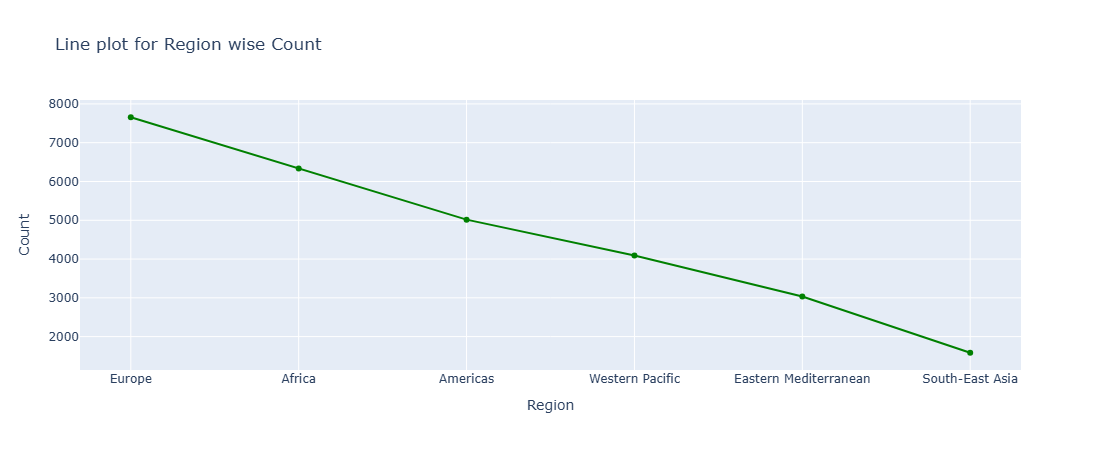

In [191]:
fig = px.line(

    x = d1.index,
    y = d1.values,
    markers = True,
    title = 'Line plot for Region wise Count',
    width = 700,
    height = 450,
    
)

fig.update_traces(line = dict(color = 'green'))  # Line color change
fig.update_layout(
    xaxis_title = 'Region',
    yaxis_title = 'Count'
)

fig.show()

### Pie Chart for Obesity Level Based on Count

In [193]:
d2 = df_obesity.groupby('obesity_level')["Gender"].count().sort_values(ascending = False)

In [197]:
d2

obesity_level
Low         24394
High         1929
Moderate     1397
Name: Gender, dtype: int64

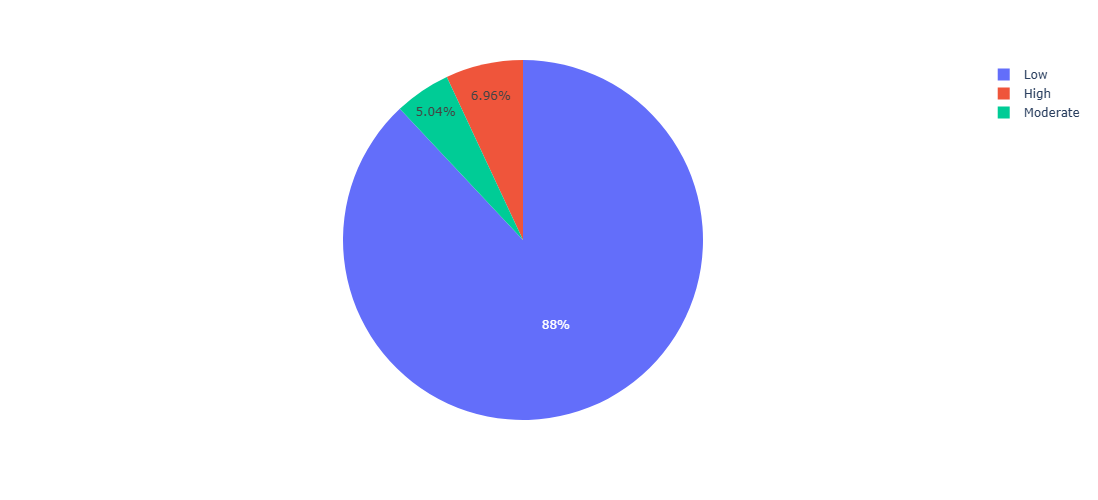

In [211]:
fig = px.pie(
    values = d2.values,
    names = d2.index,
    width = 1000,
    height = 500
)

fig.show()

### Stacked Bar for Year wise Obesity level

In [239]:
st_bar = df_obesity.groupby(["Year","obesity_level"]).agg({
    "Country" : "count"
}).reset_index().pivot_table(columns = 'obesity_level' , index = 'Year' ,values = 'Country')

In [241]:
st_bar.columns

Index(['High', 'Low', 'Moderate'], dtype='object', name='obesity_level')

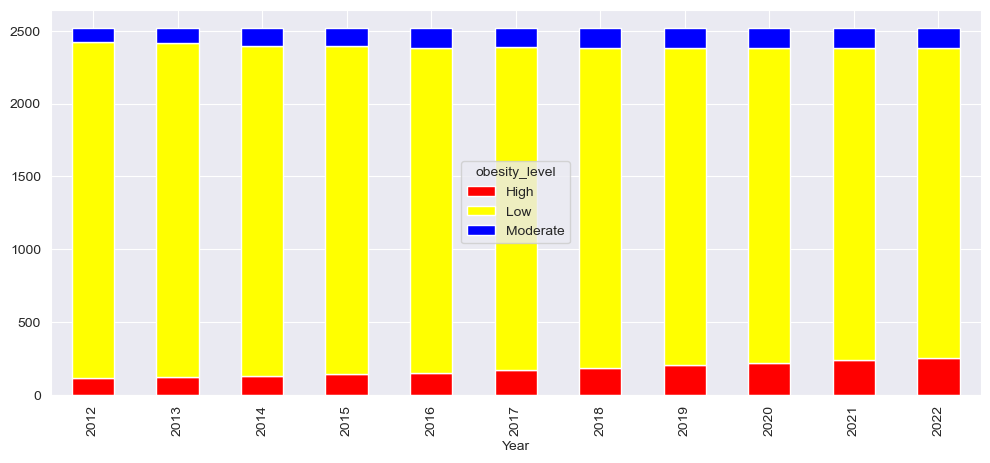

In [247]:
st_bar.plot( kind = 'bar', stacked = True, figsize = (12,5), color = ['red','yellow','blue'] )
plt.show()

## Malnutrition Plots

In [264]:
df_malnutrition.head(5)

,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,malnutrition_level
0,Gabon,Africa,Female,2021,5.79511,3.97204,8.07702,adults,4.10498,Low
4,Mongolia,Western Pacific,Both,2017,3.09065,2.42823,3.84215,adults,1.41392,Low
5,Sierra Leone,Africa,Female,2016,8.37172,6.65567,10.25312,adults,3.59745,Low
7,South-East Asia Region,South-East Asia,Both,2021,13.33635,12.24232,14.44287,adults,2.20055,Moderate
9,Qatar,Eastern Mediterranean,Male,2014,2.20807,1.25384,3.51682,adults,2.26298,Low


### Pairplot

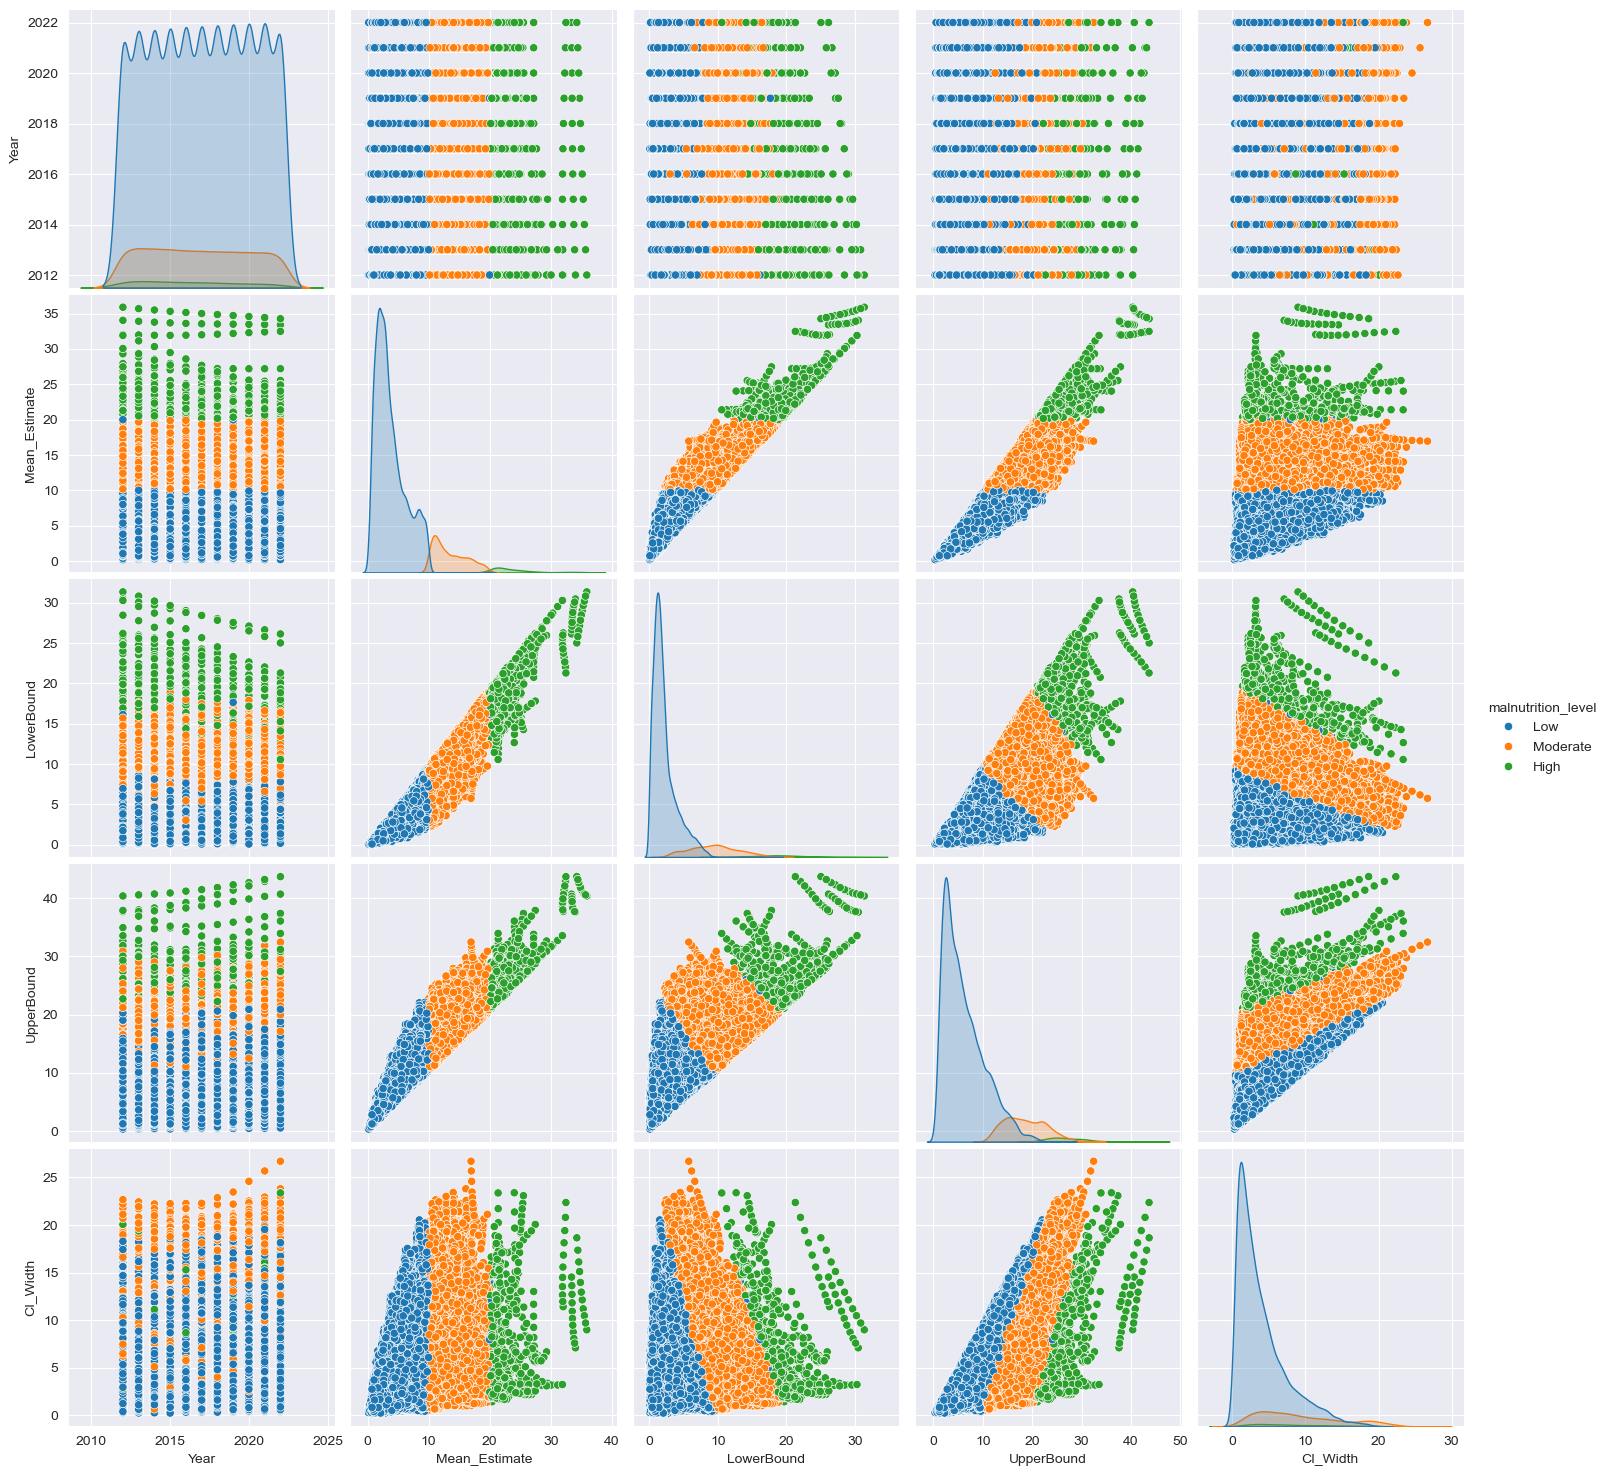

In [284]:
sns.pairplot(df_malnutrition,hue="malnutrition_level",height=3)

In [145]:
df_malnutrition.head(2)

,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,malnutrition_level
0,Gabon,Africa,Female,2021,5.79511,3.97204,8.07702,adults,4.10498,Low
4,Mongolia,Western Pacific,Both,2017,3.09065,2.42823,3.84215,adults,1.41392,Low


### Bar plot for Region

C:\Users\91968\AppData\Local\Temp\ipykernel_24548\3714052398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = s.index, y = s['Region'], palette = "coolwarm" )


<Axes: xlabel='None', ylabel='Region'>

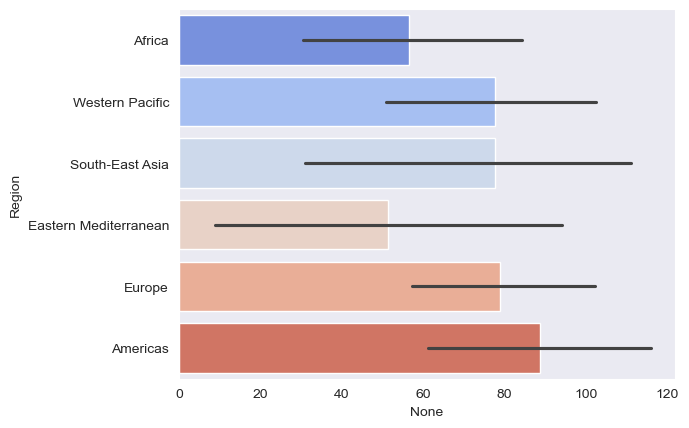

In [153]:
s = df_malnutrition.head(50)
sns.set_style('dark')
sns.barplot(x = s.index, y = s['Region'], palette = "coolwarm" )

### Box plot for Region

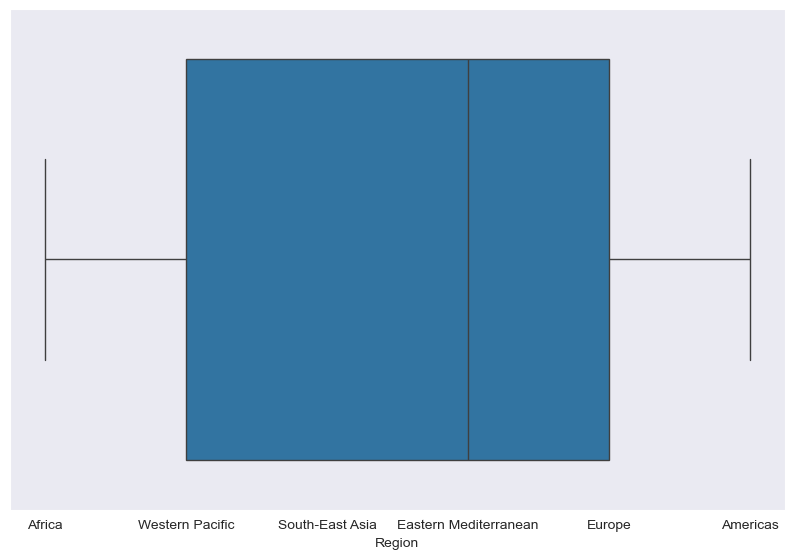

In [167]:
plt.figure(figsize = (10,6.5))
sns.boxplot(data = df_malnutrition, x = df_malnutrition['Region'])
plt.show()

# SQL Operations

In [17]:
import mysql.connector

conn = mysql.connector.connect(
    host      ="localhost",
    user      ="root",
    password  ="Sudhan140695@",
    database  = "Project2"
    
)
cursor = conn.cursor()
print("MySQL connection established!")

MySQL connection established!


In [127]:
df_obesity.head(3)

,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,obesity_level
1,"Iran, Islamic Republic of",Eastern Mediterranean,2020,Male,17.48764,15.79378,19.24573,adults,3.45195,Low
8,Iraq,Eastern Mediterranean,2020,Male,28.33553,23.08959,33.81534,adults,10.72575,Moderate
14,Greenland,Europe,2014,Female,27.94870,24.92477,31.21326,adults,6.28849,Moderate


In [129]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS obesity ( 
    Country TEXT,
    Region TEXT,
    Year int,
    Gender TEXT,
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    age_group TEXT,
    CI_Width FLOAT,
    Obesity_level TEXT
 );
""")

conn.commit()
print("Table 'obesity' created successfully in MySQL!")


Table 'obesity' created successfully in MySQL!


In [133]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS malnutrition ( 
    Country TEXT,
    Region TEXT,
    Gender TEXT,
    Year int,
    Mean_Estimate FLOAT,
    LowerBound FLOAT,
    UpperBound FLOAT,
    age_group TEXT,
    CI_Width FLOAT,
    Malnutrition_Level TEXT
 );
""")

conn.commit()
print("Table 'malnutrition' created successfully in MySQL!")


Table 'malnutrition' created successfully in MySQL!


In [135]:
for index, row in df_obesity.iterrows():
    obesity = """
    insert into obesity
    (Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,obesity_level)
    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    values = tuple(row[col] for col in df_obesity.columns)
    cursor.execute(obesity,values)

conn.commit()
print("Table inserted successfully in MySQL!")

Table inserted successfully in MySQL!


In [143]:
df_malnutrition.shape

(27720, 10)

In [141]:
for index, row in df_malnutrition.iterrows():
    malnutrition = """
    insert into malnutrition
    (Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,age_group,CI_Width,malnutrition_level)
    values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    values = tuple(row[col] for col in df_malnutrition.columns)
    cursor.execute(malnutrition,values)

conn.commit()
print("Table inserted successfully in MySQL!")

Table inserted successfully in MySQL!


# SQL Queries

In [3]:
from tabulate import tabulate

## SQL Queries For Obesity

In [19]:
# 1 .  Top 5 regions with the highest average obesity levels in the most recent year(2022) 

query_1 = """
select Region, avg(Mean_Estimate) as 'Avg obesity'
from obesity
where Year = 2022
group by Region
order by avg(Mean_Estimate) desc limit 5;
"""
cursor.execute(query_1)
result_1 = cursor.fetchall()
print("query 1 : Top 5 regions with the highest average obesity levels in the most recent year(2022)")

# Define table headers
headers = ["Region", "Avg obesity"]

# Print the result as a table
print(tabulate(result_1, headers=headers, tablefmt="grid"))

query 1 : Top 5 regions with the highest average obesity levels in the most recent year(2022)
+-----------------------+---------------+
| Region                |   Avg obesity |
+=======================+===============+
| Western Pacific       |      22.6052  |
+-----------------------+---------------+
| Americas              |      21.2221  |
+-----------------------+---------------+
| Eastern Mediterranean |      18.0366  |
+-----------------------+---------------+
| Europe                |      12.791   |
+-----------------------+---------------+
| South-East Asia       |       7.53713 |
+-----------------------+---------------+


In [199]:
# 2. Top 5 countries with highest obesity estimates : 
query_2 = """ select Country, avg(Mean_Estimate) as 'obesity estimates'
from obesity
group by Country
order by avg(Mean_Estimate) desc limit 5;
"""
cursor.execute(query_2)
result_2 = cursor.fetchall()
print("query 2 : Top 5 countries with highest obesity estimates")

# Define table headers
headers = ["Country", "obesity estimates"]

# Print the result as a table
print(tabulate(result_2, headers=headers, tablefmt="grid"))

query 2 : Top 5 countries with highest obesity estimates
+----------------+---------------------+
| Country        |   obesity estimates |
+================+=====================+
| Niue           |             40.6649 |
+----------------+---------------------+
| Cook Islands   |             39.9172 |
+----------------+---------------------+
| Nauru          |             38.5121 |
+----------------+---------------------+
| Tokelau        |             37.961  |
+----------------+---------------------+
| American Samoa |             36.892  |
+----------------+---------------------+


In [201]:
# 3. Obesity trend in India over the years(Mean_estimate) 
query_3 = """ select Country, Year, avg(Mean_Estimate) as 'obesity trend'
from obesity
where Country = 'India'
group by Year
order by Year asc;
"""
cursor.execute(query_3)
result_3 = cursor.fetchall()
print("query 3 : Obesity trend in India over the years(Mean_estimate)")

# Define table headers
headers = ["Country", "Year","obesity trend"]

# Print the result as a table
print(tabulate(result_3, headers=headers, tablefmt="grid"))

query 3 : Obesity trend in India over the years(Mean_estimate)
+-----------+--------+-----------------+
| Country   |   Year |   obesity trend |
+===========+========+=================+
| India     |   2012 |         2.47318 |
+-----------+--------+-----------------+
| India     |   2013 |         2.63465 |
+-----------+--------+-----------------+
| India     |   2014 |         2.79875 |
+-----------+--------+-----------------+
| India     |   2015 |         2.97281 |
+-----------+--------+-----------------+
| India     |   2016 |         3.15958 |
+-----------+--------+-----------------+
| India     |   2017 |         3.36218 |
+-----------+--------+-----------------+
| India     |   2018 |         3.57929 |
+-----------+--------+-----------------+
| India     |   2019 |         3.80901 |
+-----------+--------+-----------------+
| India     |   2020 |         4.05115 |
+-----------+--------+-----------------+
| India     |   2021 |         4.30782 |
+-----------+--------+-------------

In [7]:
# 4. Average obesity by gender
query_4 = """ 
select Gender, avg(Mean_Estimate) "Avg Obesity" 
from obesity
group by Gender;"""
cursor.execute(query_4)
result_4 = cursor.fetchall()
print("query 4 : Average obesity by gender")

# Define table headers
headers = ["Gender", "Avg Obesity"]

# Print the result as a table
print(tabulate(result_4, headers=headers, tablefmt="grid"))

query 4 : Average obesity by gender
+----------+---------------+
| Gender   |   Avg Obesity |
+==========+===============+
| Male     |       12.7767 |
+----------+---------------+
| Female   |       12.7245 |
+----------+---------------+
| Both     |       12.782  |
+----------+---------------+


In [21]:
# 5. Country count by obesity level category and age group
query_5 = """
select count(Country) "Country Count", age_group, Obesity_level
from obesity 
group by age_group, Obesity_level;"""
cursor.execute(query_5)
result_5 = cursor.fetchall()
print("query 5 : Country count by obesity level category and age group ")

# Define table headers
headers = ["Country Count", "Age Group", "Obesity_level"]

# Print the result as a table
print(tabulate(result_5, headers=headers, tablefmt="grid"))

query 5 : Country count by obesity level category and age group 
+-----------------+-------------+-----------------+
|   Country Count | Age Group   | Obesity_level   |
+=================+=============+=================+
|            4350 | adults      | Low             |
+-----------------+-------------+-----------------+
|             960 | adults      | Moderate        |
+-----------------+-------------+-----------------+
|            1620 | adults      | High            |
+-----------------+-------------+-----------------+
|           20044 | children    | Low             |
+-----------------+-------------+-----------------+
|             309 | children    | High            |
+-----------------+-------------+-----------------+
|             437 | children    | Moderate        |
+-----------------+-------------+-----------------+


In [27]:
# 6. Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)
query_6a = """ 
select Country, avg(CI_width) as least_reliable_countries
from obesity 
group by Country
order by least_reliable_countries desc limit 5;
"""

cursor.execute(query_6a)
result_6a = cursor.fetchall()
print("query 6a : Top 5 countries least reliable countries(with highest CI_Width) ")

# Define table headers
headers = ["Country", "least_reliable_countries"]

# Print the result as a table
print(tabulate(result_6a, headers=headers, tablefmt="grid"))


query_6b = """select Country, avg(CI_width) as consistent_countries 
from obesity 
group by Country
order by consistent_countries asc limit 5;
 """

cursor.execute(query_6b)
result_6b = cursor.fetchall()

print("query 6a : Top 5 most consistent countries (smallest average CI_Width) ")

# Define table headers
headers = ["Country", "consistent_countries"]

# Print the result as a table
print(tabulate(result_6b, headers=headers, tablefmt="grid"))


query 6a : Top 5 countries least reliable countries(with highest CI_Width) 
+---------------------+----------------------------+
| Country             |   least_reliable_countries |
+=====================+============================+
| Bermuda             |                    24.5934 |
+---------------------+----------------------------+
| American Samoa      |                    23.1135 |
+---------------------+----------------------------+
| Antigua and Barbuda |                    22.0162 |
+---------------------+----------------------------+
| Puerto Rico         |                    21.6987 |
+---------------------+----------------------------+
| Grenada             |                    21.4585 |
+---------------------+----------------------------+
query 6a : Top 5 most consistent countries (smallest average CI_Width) 
+------------------------+------------------------+
| Country                |   consistent_countries |
+========================+========================+
| Globa

In [11]:
# 7. Average obesity by age group
query_7 = """
select age_group, Avg(Mean_Estimate) "Avg Obesity"
from obesity 
group by age_group; 
"""
cursor.execute(query_7)
result_7 = cursor.fetchall()
print("query 7 : Average obesity by age group ")

# Define table headers
headers = ["age_group", "Avg Obesity"]

# Print the result as a table
print(tabulate(result_7, headers=headers, tablefmt="grid"))

query 7 : Average obesity by age group 
+-------------+---------------+
| age_group   |   Avg Obesity |
+=============+===============+
| adults      |      21.8332  |
+-------------+---------------+
| children    |       9.73698 |
+-------------+---------------+


In [29]:
# 8. Top 10 Countries with consistent low obesity (low average + low CI)over the years
query_8 = """
select Country, avg(Mean_Estimate) as Avg_Obesity, avg(CI_Width) as Avg_CI_Width
from obesity
group by Country
order by Avg_Obesity asc, Avg_CI_Width asc Limit 10;
 """
cursor.execute(query_8)
result_8 = cursor.fetchall()
print("query 8 : Top 10 Countries with consistent low obesity (low average + low CI)over the years")

# Define table headers
headers = ["Country","Avg_Obesity","Avg_CI_Width"]

# Print the result as a table
print(tabulate(result_8, headers=headers, tablefmt="grid"))

query 8 : Top 10 Countries with consistent low obesity (low average + low CI)over the years
+--------------+---------------+----------------+
| Country      |   Avg_Obesity |   Avg_CI_Width |
+==============+===============+================+
| Timor-Leste  |      0.994067 |        1.27357 |
+--------------+---------------+----------------+
| Ethiopia     |      1.492    |        1.58941 |
+--------------+---------------+----------------+
| Burkina Faso |      1.7215   |        1.53151 |
+--------------+---------------+----------------+
| Rwanda       |      1.76719  |        2.36058 |
+--------------+---------------+----------------+
| Bangladesh   |      1.97667  |        1.66351 |
+--------------+---------------+----------------+
| Madagascar   |      1.98411  |        4.35689 |
+--------------+---------------+----------------+
| Burundi      |      2.30467  |        5.19804 |
+--------------+---------------+----------------+
| Malawi       |      2.39132  |        2.63271 |
+-------

In [31]:
# 9. Countries where female obesity exceeds male by large margin (same year)
query_9 = """
select f.Country, f.Year, f.Region, f.age_group,
f.Mean_Estimate as Female_Obesity, m.Mean_Estimate as Male_Obesity, 
(f.Mean_Estimate - m.Mean_Estimate) as Obesity_Difference
from obesity f join obesity m 
on f.Country = m.Country and f.Year = m.Year and f.Region = m.Region and 
f.age_group =  m.age_group
where f.Gender = 'Female' and m.Gender = 'Male' and 
(f.Mean_Estimate - m.Mean_Estimate) > 5
order by Obesity_Difference desc;
 """
cursor.execute(query_9)
result_9 = cursor.fetchall()
print("query 9 : Countries where female obesity exceeds male by large margin (same year)")

# Define table headers
headers = ["Country", "Year","Region","age_group","Female_Obesity","Male_Obesity","Obesity_Difference"]

# Print the result as a table
print(tabulate(result_9, headers=headers, tablefmt="grid"))

query 9 : Countries where female obesity exceeds male by large margin (same year)
+-----------------------------------+--------+-----------------------+-------------+------------------+----------------+----------------------+
| Country                           |   Year | Region                | age_group   |   Female_Obesity |   Male_Obesity |   Obesity_Difference |
+===================================+========+=======================+=============+==================+================+======================+
| South Africa                      |   2022 | Africa                | adults      |         45.7316  |       12.7547  |             32.9769  |
+-----------------------------------+--------+-----------------------+-------------+------------------+----------------+----------------------+
| South Africa                      |   2021 | Africa                | adults      |         45.0106  |       12.6953  |             32.3152  |
+-----------------------------------+--------+--------

In [13]:
#  10. Global average obesity percentage per year 
query_10 = """
select Country, avg(Mean_Estimate) "Avg Obesity", year
from obesity
where Country = 'Global'
group by Country, year
order by year asc;
"""
cursor.execute(query_10)
result_10 = cursor.fetchall()
print("query 10 : Global average obesity percentage per year ")

# Define table headers
headers = ["Country", "Avg Obesity", "Year"]

# Print the result as a table
print(tabulate(result_10, headers=headers, tablefmt="grid"))

query 10 : Global average obesity percentage per year 
+-----------+---------------+--------+
| Country   |   Avg Obesity |   Year |
+===========+===============+========+
| Global    |       7.22437 |   2012 |
+-----------+---------------+--------+
| Global    |       7.47269 |   2013 |
+-----------+---------------+--------+
| Global    |       7.73352 |   2014 |
+-----------+---------------+--------+
| Global    |       8.00743 |   2015 |
+-----------+---------------+--------+
| Global    |       8.29655 |   2016 |
+-----------+---------------+--------+
| Global    |       8.60452 |   2017 |
+-----------+---------------+--------+
| Global    |       8.93208 |   2018 |
+-----------+---------------+--------+
| Global    |       9.27798 |   2019 |
+-----------+---------------+--------+
| Global    |       9.63805 |   2020 |
+-----------+---------------+--------+
| Global    |      10.0095  |   2021 |
+-----------+---------------+--------+
| Global    |      10.3969  |   2022 |
+--------

## SQL Queries for Malnutrition

In [17]:
# 1. Avg. malnutrition by age group
query_1 = """
select age_group, avg(Mean_Estimate) "Avg malnutrition" 
from malnutrition
group by age_group;
"""
cursor.execute(query_1)
result_1 = cursor.fetchall()
print("query 1 : Avg. malnutrition by age group")

# Define table headers
headers = ["age_group", "Avg malnutrition"]

# Print the result as a table
print(tabulate(result_1, headers=headers, tablefmt="grid"))

query 1 : Avg. malnutrition by age group
+-------------+--------------------+
| age_group   |   Avg malnutrition |
+=============+====================+
| adults      |            5.94062 |
+-------------+--------------------+
| children    |            5.15906 |
+-------------+--------------------+


In [5]:
# 2. Top 5 countries with highest malnutrition(mean_estimate) 
query_2 = """
select Country, avg(Mean_Estimate) as "Mean_Estimate"
from malnutrition
group by Country
order by avg(Mean_Estimate) desc limit 5; """
cursor.execute(query_2)
result_2 = cursor.fetchall()
print("query 2 : Top 5 countries with highest malnutrition(mean_estimate) ")

# Define table headers
headers = ["Country", "Mean_Estimate"]

# Print the result as a table
print(tabulate(result_2, headers=headers, tablefmt="grid"))

query 2 : Top 5 countries with highest malnutrition(mean_estimate) 
+------------------------+-----------------+
| Country                |   Mean_Estimate |
+========================+=================+
| India                  |         22.1424 |
+------------------------+-----------------+
| South-East Asia Region |         19.2389 |
+------------------------+-----------------+
| Bangladesh             |         18.2458 |
+------------------------+-----------------+
| Sri Lanka              |         17.8719 |
+------------------------+-----------------+
| Eritrea                |         17.4725 |
+------------------------+-----------------+


In [7]:
# 3. Malnutrition trend in African region over the years 
query_3 = """
select Region, Year, avg(Mean_Estimate) as "Malnutrition_trend"
from malnutrition
where Region = 'Africa'
group by Year
order by Year asc;"""
cursor.execute(query_3)
result_3 = cursor.fetchall()
print("query 3 : Malnutrition trend in African region over the years")

# Define table headers
headers = ["Region", "Year","Malnutrition_trend"]

# Print the result as a table
print(tabulate(result_3, headers=headers, tablefmt="grid"))

query 3 : Malnutrition trend in African region over the years
+----------+--------+----------------------+
| Region   |   Year |   Malnutrition_trend |
+==========+========+======================+
| Africa   |   2012 |              8.87326 |
+----------+--------+----------------------+
| Africa   |   2013 |              8.7739  |
+----------+--------+----------------------+
| Africa   |   2014 |              8.68722 |
+----------+--------+----------------------+
| Africa   |   2015 |              8.61256 |
+----------+--------+----------------------+
| Africa   |   2016 |              8.54841 |
+----------+--------+----------------------+
| Africa   |   2017 |              8.49223 |
+----------+--------+----------------------+
| Africa   |   2018 |              8.44093 |
+----------+--------+----------------------+
| Africa   |   2019 |              8.39636 |
+----------+--------+----------------------+
| Africa   |   2020 |              8.35843 |
+----------+--------+-----------------

In [9]:
# 4. Gender-based average malnutrition 
query_4 = """
select Gender, avg(Mean_Estimate) as Avg_Mean_Estimate
from malnutrition
group by Gender;
"""
cursor.execute(query_4)
result_4 = cursor.fetchall()
print("query 4 : Gender-based average malnutrition")

# Define table headers
headers = ["Gender", "Avg_Mean_Estimate"]

# Print the result as a table
print(tabulate(result_4, headers=headers, tablefmt="grid"))

query 4 : Gender-based average malnutrition
+----------+---------------------+
| Gender   |   Avg_Mean_Estimate |
+==========+=====================+
| Female   |             4.67548 |
+----------+---------------------+
| Both     |             5.36155 |
+----------+---------------------+
| Male     |             6.02632 |
+----------+---------------------+


In [11]:
# 5. Malnutrition level-wise (average CI_Width by age group) 
query_5 = """
select age_group, avg(CI_Width) as Avg_CI_Width
from malnutrition
group by age_group; 
"""
cursor.execute(query_5)
result_5 = cursor.fetchall()
print("query 5 : Malnutrition level-wise (average CI_Width by age group)")

# Define table headers
headers = ["age_group", "Avg_CI_Width"]

# Print the result as a table
print(tabulate(result_5, headers=headers, tablefmt="grid"))

query 5 : Malnutrition level-wise (average CI_Width by age group)
+-------------+----------------+
| age_group   |   Avg_CI_Width |
+=============+================+
| adults      |        3.69378 |
+-------------+----------------+
| children    |        5.10313 |
+-------------+----------------+


In [13]:
# 6. Yearly malnutrition change in specific countries(India, Nigeria, Brazil)
query_6 = """
select Country, Year, avg(Mean_Estimate) as malnutrition
from malnutrition
where Country in ('India','Nigeria','Brazil')
group by Country, year
order by Country, Year asc;
 """
cursor.execute(query_6)
result_6 = cursor.fetchall()
print("query 6 : Yearly malnutrition change in specific countries(India, Nigeria, Brazil) ")

# Define table headers
headers = ["Country", "Year","malnutrition"]

# Print the result as a table
print(tabulate(result_6, headers=headers, tablefmt="grid"))

query 6 : Yearly malnutrition change in specific countries(India, Nigeria, Brazil) 
+-----------+--------+----------------+
| Country   |   Year |   malnutrition |
+===========+========+================+
| Brazil    |   2012 |        2.83865 |
+-----------+--------+----------------+
| Brazil    |   2013 |        2.78139 |
+-----------+--------+----------------+
| Brazil    |   2014 |        2.73503 |
+-----------+--------+----------------+
| Brazil    |   2015 |        2.69895 |
+-----------+--------+----------------+
| Brazil    |   2016 |        2.67224 |
+-----------+--------+----------------+
| Brazil    |   2017 |        2.65357 |
+-----------+--------+----------------+
| Brazil    |   2018 |        2.64157 |
+-----------+--------+----------------+
| Brazil    |   2019 |        2.6346  |
+-----------+--------+----------------+
| Brazil    |   2020 |        2.62941 |
+-----------+--------+----------------+
| Brazil    |   2021 |        2.62664 |
+-----------+--------+--------------

In [15]:
# 7. Regions with lowest malnutrition averages 
query_7 = """
select Region, avg(Mean_Estimate) as Lowest_Malnutrition_Avg
from malnutrition
group by Region
order by avg(Mean_Estimate) asc;
 """
cursor.execute(query_7)
result_7 = cursor.fetchall()
print("query 7 : Regions with lowest malnutrition averages ")

# Define table headers
headers = ["Region", "Lowest_Malnutrition_Avg"]

# Print the result as a table
print(tabulate(result_7, headers=headers, tablefmt="grid"))

query 7 : Regions with lowest malnutrition averages 
+-----------------------+---------------------------+
| Region                |   Lowest_Malnutrition_Avg |
+=======================+===========================+
| Europe                |                   2.9632  |
+-----------------------+---------------------------+
| Americas              |                   3.14448 |
+-----------------------+---------------------------+
| Western Pacific       |                   3.28701 |
+-----------------------+---------------------------+
| Eastern Mediterranean |                   6.8037  |
+-----------------------+---------------------------+
| Africa                |                   8.52796 |
+-----------------------+---------------------------+
| South-East Asia       |                  13.7795  |
+-----------------------+---------------------------+


In [33]:
# 8. Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX() on Mean_Estimate per country to compare early vs. recent malnutrition levels,
# and filter where the difference is positive using HAVING.)
query_8 = """
select Country, Min(Year) as Start_Year, Max(Year) as End_Year, 
Min(Mean_Estimate) as Earliest_Mean, Max(Mean_Estimate) as Latest_Mean,
(Max(Mean_Estimate) - Min(Mean_Estimate)) as Increase
from malnutrition
group by Country
having Latest_Mean > Earliest_Mean
order by Increase desc;
 """
cursor.execute(query_8)
result_8 = cursor.fetchall()
print("query 8 :Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX() on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)")

# Define table headers
headers = ["Country","Start_Year","End_Year","Earliest_Mean","Latest_Mean","Increase"]

# Print the result as a table
print(tabulate(result_8, headers=headers, tablefmt="grid"))

query 8 :Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX() on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)
+----------------------------------------+--------------+------------+-----------------+---------------+------------+
| Country                                |   Start_Year |   End_Year |   Earliest_Mean |   Latest_Mean |   Increase |
+========================================+==============+============+=================+===============+============+
| Eritrea                                |         2012 |       2022 |         7.86806 |      35.8941  |   28.0261  |
+----------------------------------------+--------------+------------+-----------------+---------------+------------+
| Ethiopia                               |         2012 |       2022 |         7.55397 |      29.3041  |   21.7501  |
+----------------------------------------+--------------+------------+--------

In [17]:
# 9. Min/Max malnutrition levels year-wise comparison
query_9 = """
select Year,avg(UpperBound) as Max_Malnutrition_Avg, avg(LowerBound) as Min_Malnutrition_Avg,
avg(UpperBound)-avg(LowerBound)  as Min_Max_Comparison
from malnutrition
group by Year
order by Year asc;
 """
cursor.execute(query_9)
result_9 = cursor.fetchall()
print("query 9 : Min/Max malnutrition levels year-wise comparison")

# Define table headers
headers = ["Year", "Max_Malnutrition_Avg","Min_Malnutrition_Avg","Min_Max_Comparison"]

# Print the result as a table
print(tabulate(result_9, headers=headers, tablefmt="grid"))

query 9 : Min/Max malnutrition levels year-wise comparison
+--------+------------------------+------------------------+----------------------+
|   Year |   Max_Malnutrition_Avg |   Min_Malnutrition_Avg |   Min_Max_Comparison |
+========+========================+========================+======================+
|   2012 |                8.01142 |                3.79803 |              4.21338 |
+--------+------------------------+------------------------+----------------------+
|   2013 |                7.95221 |                3.74593 |              4.20628 |
+--------+------------------------+------------------------+----------------------+
|   2014 |                7.91831 |                3.68771 |              4.2306  |
+--------+------------------------+------------------------+----------------------+
|   2015 |                7.91194 |                3.62091 |              4.29103 |
+--------+------------------------+------------------------+----------------------+
|   2016 |       

In [19]:
# 10. High CI_Width flags for monitoring(CI_width > 5)
query_10 = """
select Region, Year, CI_Width
from malnutrition
where CI_Width > 5
order by CI_Width desc;
 """
cursor.execute(query_10)
result_10 = cursor.fetchall()
print("query 10 : High CI_Width flags for monitoring(CI_width > 5) ")

# Define table headers
headers = ["Region", "Year", "CI_Width"]

# Print the result as a table
print(tabulate(result_10, headers=headers, tablefmt="grid"))

query 10 : High CI_Width flags for monitoring(CI_width > 5) 
+-----------------------+--------+------------+
| Region                |   Year |   CI_Width |
+=======================+========+============+
| Africa                |   2022 |   26.7017  |
+-----------------------+--------+------------+
| Africa                |   2021 |   25.6793  |
+-----------------------+--------+------------+
| Africa                |   2020 |   24.5864  |
+-----------------------+--------+------------+
| Africa                |   2022 |   23.8105  |
+-----------------------+--------+------------+
| Africa                |   2019 |   23.4669  |
+-----------------------+--------+------------+
| Africa                |   2022 |   23.4177  |
+-----------------------+--------+------------+
| Africa                |   2022 |   23.3897  |
+-----------------------+--------+------------+
| Africa                |   2022 |   23.3688  |
+-----------------------+--------+------------+
| Eastern Mediterranean |  

##  Combined (5 Queries) 

In [22]:
# 1. Obesity vs malnutrition comparison by country(any 5 countries)
query_1 = """
select A.Country as "Country", A.Region as "Region", A.Year as "Year",
avg(A.Mean_Estimate) as "Obesity_Mean_Estimate", avg(B.Mean_Estimate) as "Malnutrition_Mean_Estimate" 
from obesity A join malnutrition B
on A.Country = B.Country and A.Year = B.Year
where A.Country in ("India","Iraq","Afghanistan","Zimbabwe","Canada")
group by A.Country, A.Region, A.Year
order by A.Country, A.Year Asc;
"""
cursor.execute(query_1)
result_1 = cursor.fetchall()
print("query 1 : Obesity vs malnutrition comparison by country(any 5 countries)")

# Define table headers
headers = ["Country", "Region","Year","Obesity_Mean_Estimate","Malnutrition_Mean_Estimate"]

# Print the result as a table
print(tabulate(result_1, headers=headers, tablefmt="grid"))

query 1 : Obesity vs malnutrition comparison by country(any 5 countries)
+-------------+-----------------------+--------+-------------------------+------------------------------+
| Country     | Region                |   Year |   Obesity_Mean_Estimate |   Malnutrition_Mean_Estimate |
+=============+=======================+========+=========================+==============================+
| Afghanistan | Eastern Mediterranean |   2012 |                 5.20983 |                     11.2952  |
+-------------+-----------------------+--------+-------------------------+------------------------------+
| Afghanistan | Eastern Mediterranean |   2013 |                 5.6072  |                     10.8562  |
+-------------+-----------------------+--------+-------------------------+------------------------------+
| Afghanistan | Eastern Mediterranean |   2014 |                 6.03947 |                     10.4268  |
+-------------+-----------------------+--------+-------------------------+-----

In [5]:
# 2. Gender-based disparity in both obesity and malnutrition alter
query_2 = """
select A.Region as "Region", A.Gender as "Gender",
avg(A.Mean_Estimate) as "Obesity_Mean_Estimate", avg(B.Mean_Estimate) as "Malnutrition_Mean_Estimate" 
from obesity A join malnutrition B
on A.Country = B.Country and A.Gender = B.Gender
group by A.Region, A.Gender
order by A.Region, A.Gender Asc;
"""
cursor.execute(query_2)
result_2 = cursor.fetchall()
print("query 2 : Gender-based disparity in both obesity and malnutrition alter")

# Define table headers
headers = ["Region", "Gender", "Obesity_Mean_Estimate","Malnutrition_Mean_Estimate"]

# Print the result as a table
print(tabulate(result_2, headers=headers, tablefmt="grid"))

query 2 : Gender-based disparity in both obesity and malnutrition alter
+-----------------------+----------+-------------------------+------------------------------+
| Region                | Gender   |   Obesity_Mean_Estimate |   Malnutrition_Mean_Estimate |
+=======================+==========+=========================+==============================+
| Africa                | Both     |                 5.413   |                      8.53303 |
+-----------------------+----------+-------------------------+------------------------------+
| Africa                | Female   |                 6.46175 |                      6.76444 |
+-----------------------+----------+-------------------------+------------------------------+
| Africa                | Male     |                 4.32443 |                     10.2864  |
+-----------------------+----------+-------------------------+------------------------------+
| Americas              | Both     |                18.4597  |                    

In [7]:
# 3. Region-wise avg estimates side-by-side(Africa and America) 
query_3 = """ 
select A.Region as "Region", A.Country as "Country", 
avg(A.Mean_Estimate) as "Obesity_Mean_Estimate", avg(B.Mean_Estimate) as "Malnutrition_Mean_Estimate" 
from obesity A join malnutrition B
on A.Country = B.Country and A.Region = B.Region
where A.Region in ('Africa', 'Americas')
group by A.Country, A.Region
order by A.Region Asc;
 """
cursor.execute(query_3)
result_3 = cursor.fetchall()
print("query 3 : Region-wise avg estimates side-by-side(Africa and America) ")

# Define table headers
headers = ["Region", "Country","Obesity_Mean_Estimate","Malnutrition_Mean_Estimate"]

# Print the result as a table
print(tabulate(result_3, headers=headers, tablefmt="grid"))

query 3 : Region-wise avg estimates side-by-side(Africa and America) 
+----------+---------------------------------------+-------------------------+------------------------------+
| Region   | Country                               |   Obesity_Mean_Estimate |   Malnutrition_Mean_Estimate |
+==========+=======================================+=========================+==============================+
| Africa   | Gabon                                 |                 7.24071 |                     6.13081  |
+----------+---------------------------------------+-------------------------+------------------------------+
| Africa   | Sierra Leone                          |                 3.29694 |                     5.28339  |
+----------+---------------------------------------+-------------------------+------------------------------+
| Africa   | Mauritius                             |                11.9141  |                     8.44472  |
+----------+--------------------------------------

In [35]:
# 4. Countries with obesity up & malnutrition down
query_4 = """
select A.Country as "Country", min(A.Mean_Estimate) as "Obesity_Earliest", 
max(A.Mean_Estimate) as "Obesity_Latest",
min(B.Mean_Estimate) as "Malnutrition_Earliest", 
max(B.Mean_Estimate) as "Malnutrition_Latest"
from obesity A join malnutrition B
on A.Country = B.Country and A.Year = B.Year
group by A.Country
having Obesity_Latest > Obesity_Earliest and Malnutrition_Latest > Malnutrition_Earliest
order by Obesity_Latest - Obesity_Earliest desc;
"""
cursor.execute(query_4)
result_4 = cursor.fetchall()
print("query 4 : Countries with obesity up & malnutrition down")

# Define table headers
headers = ["Country", "Obesity_Earliest","Obesity_Latest","Malnutrition_Earliest","Malnutrition_Latest"]

# Print the result as a table
print(tabulate(result_4, headers=headers, tablefmt="grid"))


query 4 : Countries with obesity up & malnutrition down
+----------------------------------------+--------------------+------------------+-------------------------+-----------------------+
| Country                                |   Obesity_Earliest |   Obesity_Latest |   Malnutrition_Earliest |   Malnutrition_Latest |
+========================================+====================+==================+=========================+=======================+
| American Samoa                         |           10.7365  |         80.6093  |                 0.24652 |               1.14696 |
+----------------------------------------+--------------------+------------------+-------------------------+-----------------------+
| Tonga                                  |           17.4031  |         79.0533  |                 0.17531 |               1.06922 |
+----------------------------------------+--------------------+------------------+-------------------------+-----------------------+
| Samoa      

In [9]:
# 5. Age-wise trend analysis
query_5 = """
select A.age_group as "Age_Group", A.Region as "Region", A.Gender as "Gender", 
A.Obesity_level as "Obesity_Level", B.Malnutrition_Level as "Malnutrition_Level",
avg(A.Mean_Estimate) as "Obesity_Mean_Estimate", avg(B.Mean_Estimate) as "Malnutrition_Mean_Estimate" 
from obesity A join malnutrition B 
On A.Country = B.Country and A.Region = B.Region and A.age_group = B.age_group  and A.Gender = B.Gender
group by A.Region, A.Gender, A.age_group, A.Obesity_level, B.Malnutrition_Level
order by A.age_group, A.Region Asc;
 """
cursor.execute(query_5)
result_5 = cursor.fetchall()
print("query 5 : Age-wise trend analysis ")

# Define table headers
headers = ["Age_Group", "Region", "Gender","Obesity_Level","Malnutrition_Level","Obesity_Mean_Estimate","Malnutrition_Mean_Estimate"]

# Print the result as a table
print(tabulate(result_5, headers=headers, tablefmt="grid"))

query 5 : Age-wise trend analysis 
+-------------+-----------------------+----------+-----------------+----------------------+-------------------------+------------------------------+
| Age_Group   | Region                | Gender   | Obesity_Level   | Malnutrition_Level   |   Obesity_Mean_Estimate |   Malnutrition_Mean_Estimate |
+=============+=======================+==========+=================+======================+=========================+==============================+
| adults      | Africa                | Female   | Low             | Low                  |                14.0588  |                     7.5972   |
+-------------+-----------------------+----------+-----------------+----------------------+-------------------------+------------------------------+
| adults      | Africa                | Female   | Moderate        | Low                  |                27.1871  |                     5.00314  |
+-------------+-----------------------+----------+-----------------+---

# StreamLit

In [13]:
%%writefile Project2.py
import streamlit as st
#st.set_page_config(layout = 'wide')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import base64

# Set page config (optional)
st.set_page_config(page_title="Nutrition App", layout="wide")

# Function to load and encode local jpg image
def get_base64_of_bin_file(bin_file):
    with open(bin_file, 'rb') as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Local image filename (same folder)
image_file = 'iii.jpg'

# Get base64 string
img_base64 = get_base64_of_bin_file(image_file)

# Inject HTML + CSS for background
page_bg_img = f"""
<style>
.stApp {{
  background-image: url("data:image/jpg;base64,{img_base64}");
  background-size: cover;
  background-repeat: no-repeat;
  background-attachment: fixed;
}}
</style>
"""

# Load CSS
st.markdown(page_bg_img, unsafe_allow_html=True)

import mysql.connector

conn = mysql.connector.connect(
    host      ="localhost",
    user      ="root",
    password  ="Sudhan140695@",
    database  = "project2"
    
)
cursor = conn.cursor()
print("MySQL connection established!")


# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Plots", "SQL Queries", "Suggestions" , "Creator Info"])

# -------------------------------- PAGE 1: Introduction --------------------------------
if page == "Project Introduction":
    st.title("⚖️ Nutrition Paradox: A Global View on Obesity and Malnutrition")
    st.subheader("📊 A Streamlit App for a Global View on Obesity and Malnutrition Insights")
    st.write("""
    **This project analyzes Obesity and Malnutrition Insights data from different Years using an MySQL database :-**

    ●  Nutrition Risk Monitoring: Identify countries with extremely high obesity or malnutrition
    levels, flagging them for public health intervention\n
    ● Demographic Disparity Analysis: Understand how gender and age groups contribute
    differently to obesity and malnutrition statistics.\n
    ● Data-Driven Policy Planning: Help policymakers prioritize regions for funding and
    nutrition-related programs based on multi-dimensional data.\n
    ● Comparative Region Analysis: Enable researchers to compare regional trends and
    draw correlations between health indicators and socio-economic conditions.\n  
    ● Public Health Reporting: Provide government or NGOs with a summarized SQL 
    dashboard showing country-level nutrition trends.

    **Features:**
    - View and filter Nutrition data by Country, Region, Year, etc,.
    - Generate dynamic visualizations.
    - Run predefined SQL queries to explore insights.

    **Database Used:** `project2`
    """)
    st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\images (11).jpeg', width=152)

# -------------------------------- PAGE 2: Plots --------------------------------
elif page == "Plots":
    
    st.title("Obesity & Malnutrition Dashboard")
    "\n"
    "\n"
    "\n"

    obesity = "select * from obesity"
    malnutrition = "select * from malnutrition"

    obesity_df = pd.read_sql(obesity,conn)
    malnutrition_df = pd.read_sql(malnutrition,conn)

    pl = st.sidebar.radio("Choose Options", ["Filtered Plots", "Plots"])
    
    if pl == "Filtered Plots":
    
        
        # Sidebar filters
        countries = sorted(obesity_df['Country'].unique())
        years = sorted(obesity_df['Year'].unique())
        
        selected_country = st.sidebar.selectbox("Select a Country", countries)
        selected_year_range = st.sidebar.slider("Select Year Range", min_value=min(years), max_value=max(years),
                                                value=(min(years), max(years)))
        
        # Filtered Data
        filtered_obesity = obesity_df[
            (obesity_df['Country'] == selected_country) &
            (obesity_df['Year'] >= selected_year_range[0]) &
            (obesity_df['Year'] <= selected_year_range[1])
        ]
        
        filtered_malnutrition = malnutrition_df[
            (malnutrition_df['Country'] == selected_country) &
            (malnutrition_df['Year'] >= selected_year_range[0]) &
            (malnutrition_df['Year'] <= selected_year_range[1])
        ]
        
        # Plot 1: Obesity Trend
        st.header(f"Obesity Trend in {selected_country} ({selected_year_range[0]}–{selected_year_range[1]})")
        fig1, ax1 = plt.subplots(figsize=(10, 4))
        sns.lineplot(data=filtered_obesity, x="Year", y="Mean_Estimate", hue="Gender", marker="o", ax=ax1)
        ax1.set_title("Obesity Estimate Over Time")
        ax1.set_ylabel("Mean Estimate")
        st.pyplot(fig1)
        st.markdown("""## Client Summary : """)
        st.markdown("""
        ### This plot reveals the historical obesity trend in the selected country. You can clearly see if obesity is rising or falling over the years. The color-coded lines allow comparison between male and female obesity levels, highlighting gender-specific health disparities.
        """)
        "\n"
        "\n"
        "\n"
        "\n"
        "\n"

        
        # Plot 2: Malnutrition Trend
        st.header(f"Malnutrition Trend in {selected_country} ({selected_year_range[0]}–{selected_year_range[1]})")
        fig2, ax2 = plt.subplots(figsize=(10, 4))
        sns.lineplot(data=filtered_malnutrition, x="Year", y="Mean_Estimate", hue="Gender", marker="o", ax=ax2)
        ax2.set_title("Malnutrition Estimate Over Time")
        ax2.set_ylabel("Mean Estimate")
        st.pyplot(fig2)
        st.markdown("""## Client Summary : """)
        st.markdown("""
        ### This visualization shows how malnutrition estimates have evolved. A rising trend may signal worsening food insecurity, while a decline suggests improved nutrition access. The comparison by gender can reveal if interventions are reaching both males and females equitably.
        """)
        "\n"
        "\n"
        "\n"
        "\n"
        "\n"
        
        # Plot 3: Obesity vs Malnutrition Comparison
        st.header(f"Obesity vs Malnutrition in {selected_country}")
        merged = filtered_obesity[["Year", "Mean_Estimate"]].rename(columns={"Mean_Estimate": "Obesity"}).merge(
            filtered_malnutrition[["Year", "Mean_Estimate"]].rename(columns={"Mean_Estimate": "Malnutrition"}), 
            on="Year"
        )
        fig3, ax3 = plt.subplots(figsize=(6, 6))
        sns.scatterplot(data=merged, x="Obesity", y="Malnutrition", s=100, ax=ax3)
        ax3.set_title("Obesity vs Malnutrition")
        st.pyplot(fig3)
        st.markdown("""## Client Summary : """)
        st.markdown("""
        ### This plot shows whether higher obesity is associated with lower or higher malnutrition in the same country and time range. In some cases, you may find both rising (indicating a double burden of malnutrition), or an inverse relationship (suggesting nutritional transitions).
        """)
        "\n"
        "\n"
        "\n"
        "\n"
        "\n"


    elif pl == "Plots":

        # 1. Heatmap: Obesity Mean by Country and Year
       
        
        st.subheader("Obesity Heatmap (Mean Estimate by Country & Year)")
        pivot = obesity_df.pivot_table(values="Mean_Estimate", index="Country", columns="Year")
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".1f", ax=ax)
        ax.set_title("Obesity Estimates Heatmap")
        st.pyplot(fig)
        st.text('Purpose :')
        st.text('Easily spot changes in obesity levels over time by country.')
        "\n"
        "\n"
        "\n"
        st.text('Client Summary :')
        st.text("""
        The obesity heatmap provides a visual representation of the mean
        estimate of obesity levels across various countries from 2012 to 
        2022. The data reveals a concerning trend of increasing obesity
        levels in many countries, with some regions exhibiting more 
        pronounced changes.
       """)
        "\n"
        "\n"
        "\n"

        
        # 2. Box Plot: CI_Width by Gender
        
        st.subheader("CI_Width Distribution by Gender (Obesity)")
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=obesity_df, x="Gender", y="CI_Width", palette="Set2", ax=ax)
        ax.set_title("Confidence Interval Width by Gender")
        st.pyplot(fig)
        st.text('Purpose :')
        st.text('Compare variability (confidence interval width) between genders.')
        "\n"
        "\n"
        "\n"
        st.text('Client Summary :')
        st.text("""
        This plot shows that males have the highest variability in 
        confidence interval (CI) widths for obesity, followed by females. 
        The 'Both' gender group shows the least variability, indicating 
        more consistent estimates.
       """)
        "\n"
        "\n"
        "\n"
         
        # 3. Box Plot: CI_Width by Gender
        
        st.subheader("CI_Width Distribution by Gender (Malnutrition)")
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.boxplot(data=malnutrition_df, x="Gender", y="CI_Width", palette="Set2", ax=ax)
        ax.set_title("Confidence Interval Width by Gender")
        st.pyplot(fig)
        st.text('Purpose :')
        st.text('Compare variability (confidence interval width) between genders.')
        "\n"
        "\n"
        "\n"
        st.text('Client Summary :')
        st.text("""
        This plot shows that the confidence interval (CI) width 
        for malnutrition varies by gender, with males generally 
        having wider CIs and more variability. The lowest variability 
        is observed in the "Both Gender" group.
       """)
        "\n"
        "\n"
        "\n"
        
        # 4. Pair Plot: CI_Width vs. Mean_Estimate (Obesity)

        st.subheader("Pair Plot: Obesity Confidence & Estimate")
        fig = sns.pairplot(obesity_df[['Mean_Estimate', 'CI_Width']], kind="scatter")
        st.pyplot(fig)
        st.text('Purpose :')
        st.text('Understand correlation between CI and estimate values.')
        "\n"
        "\n"
        "\n"
        st.text('Client Summary :')
        st.text("""
        This plot appears to be analyzing the relationship between 
        the mean estimate of Obesity and the confidence interval (CI) width. 
        The plot is divided into four quadrants, each displaying 
        a different aspects of the data.
       """)
        "\n"
        "\n"
        "\n"




# -------------------------------- PAGE 3: SQL Queries --------------------------------

elif page == "SQL Queries":
    st.title("📋 SQL Query Results")

    def get_data(query, params=None):
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password="Sudhan140695@",
            database="project2"
        )
        if params:
            df = pd.read_sql(query, conn, params=params)
        else:
            df = pd.read_sql(query, conn)
        conn.close()
        return df

    obesity_queries = {
        "1. Top 5 regions with the highest average obesity levels in the most recent year(2022) " : " select Region, avg(Mean_Estimate) as 'Avg obesity' from obesity where Year = 2022 group by Region order by avg(Mean_Estimate) desc limit 5;",
        "2. Top 5 countries with highest obesity estimates :  " : " select Country, avg(Mean_Estimate) as 'obesity estimates' from obesity group by Country order by avg(Mean_Estimate) desc limit 5;",
        "3. Obesity trend in India over the years(Mean_estimate) " : "select Country, Year, avg(Mean_Estimate) as 'obesity trend' from obesity where Country = 'India' group by Year order by Year asc;",
        "4. Average obesity by gender " : "select Gender, avg(Mean_Estimate) 'Avg Obesity'  from obesity group by Gender;",
        "5. Country count by obesity level category and age group " : "select count(Country) 'Country Count', age_group, Obesity_level from obesity group by age_group, Obesity_level;",
        "6. Top 5 countries least reliable countries(with highest CI_Width) " : "select Country, avg(CI_width) as least_reliable_countries from obesity group by Country order by least_reliable_countries desc limit 5;",
        "7. Top 5 most consistent countries (smallest average CI_Width) " : "select Country, avg(CI_width) as consistent_countries from obesity group by Country order by consistent_countries asc limit 5",
        "8. Average obesity by age group" : "select age_group, Avg(Mean_Estimate) 'Avg Obesity' from obesity group by age_group;",
        "9. Top 10 Countries with consistent low obesity (low average + low CI)over the years" : "select Country, avg(Mean_Estimate) as Avg_Obesity, avg(CI_Width) as Avg_CI_Width from obesity group by Country order by Avg_Obesity asc, Avg_CI_Width asc Limit 10;",
        "10. Countries where female obesity exceeds male by large margin (same year) " : "select f.Country, f.Year, f.Region, f.age_group, f.Mean_Estimate as Female_Obesity, m.Mean_Estimate as Male_Obesity,  (f.Mean_Estimate - m.Mean_Estimate) as Obesity_Difference from obesity f join obesity m  on f.Country = m.Country and f.Year = m.Year and f.Region = m.Region and  f.age_group =  m.age_group where f.Gender = 'Female' and m.Gender = 'Male' and  (f.Mean_Estimate - m.Mean_Estimate) > 5 order by Obesity_Difference desc;",
        "11. Global average obesity percentage per year  " : "select Country, avg(Mean_Estimate) 'Avg Obesity', year from obesity where Country = 'Global' group by Country, year order by year asc;"
                  }
        
    malnutrition_queries = {
            "1. Avg. malnutrition by age group " : " select age_group, avg(Mean_Estimate) 'Avg malnutrition' from malnutrition group by age_group;",
            "2. Top 5 countries with highest malnutrition(mean_estimate)  " : " select Country, avg(Mean_Estimate) as 'Mean_Estimate' from malnutrition group by Country order by avg(Mean_Estimate) desc limit 5;",
            "3. Malnutrition trend in African region over the years " : "select Region, Year, avg(Mean_Estimate) as 'Malnutrition_trend' from malnutrition where Region = 'Africa' group by Year order by Year asc;",
            "4. Gender-based average malnutrition " : "select Gender, avg(Mean_Estimate) as Avg_Mean_Estimate from malnutrition group by Gender;",
            "5. Malnutrition level-wise (average CI_Width by age group)  " : "select age_group, avg(CI_Width) as Avg_CI_Width from malnutrition group by age_group;",
            "6. Yearly malnutrition change in specific countries(India, Nigeria, Brazil) " : "select Country, Year, avg(Mean_Estimate) as malnutrition from malnutrition where Country in ('India','Nigeria','Brazil') group by Country, year order by Country, Year asc;",
            "7. Regions with lowest malnutrition averages " : "select Region, avg(Mean_Estimate) as Lowest_Malnutrition_Avg from malnutrition group by Region order by avg(Mean_Estimate) asc;",
            "8. Countries with increasing malnutrition " : "select Country, Min(Year) as Start_Year, Max(Year) as End_Year, Min(Mean_Estimate) as Earliest_Mean, Max(Mean_Estimate) as Latest_Mean, (Max(Mean_Estimate) - Min(Mean_Estimate)) as Increase from malnutrition group by Country having Latest_Mean > Earliest_Mean order by Increase desc;",
            "9. Min/Max malnutrition levels year-wise comparison" : "select Year,avg(UpperBound) as Max_Malnutrition_Avg, avg(LowerBound) as Min_Malnutrition_Avg, avg(UpperBound)-avg(LowerBound)  as Min_Max_Comparison from malnutrition group by Year order by Year asc;",
            "10. High CI_Width flags for monitoring(CI_width > 5) " : "select Region, Year, CI_Width from malnutrition where CI_Width > 5 order by CI_Width desc;"
                   }
        
        
    combined_queries = {
            "1. Obesity vs malnutrition comparison by country(any 5 countries) " : "select A.Country as 'Country', A.Region as 'Region', A.Year as 'Year', avg(A.Mean_Estimate) as 'Obesity_Mean_Estimate', avg(B.Mean_Estimate) as 'Malnutrition_Mean_Estimate'  from obesity A join malnutrition B on A.Country = B.Country and A.Year = B.Year where A.Country in ('India','Iraq','Afghanistan','Zimbabwe','Canada') group by A.Country, A.Region, A.Year order by A.Country, A.Year Asc;",
            "2. Gender-based disparity in both obesity and malnutrition alter  " : " select A.Region as 'Region', A.Gender as 'Gender', avg(A.Mean_Estimate) as 'Obesity_Mean_Estimate', avg(B.Mean_Estimate) as 'Malnutrition_Mean_Estimate' from obesity A join malnutrition B on A.Country = B.Country and A.Gender = B.Gender group by A.Region, A.Gender order by A.Region, A.Gender Asc;",
            "3. Region-wise avg estimates side-by-side(Africa and America) " : "select A.Region as 'Region', A.Country as 'Country', avg(A.Mean_Estimate) as 'Obesity_Mean_Estimate', avg(B.Mean_Estimate) as 'Malnutrition_Mean_Estimate'  from obesity A join malnutrition B on A.Country = B.Country and A.Region = B.Region where A.Region in ('Africa', 'Americas') group by A.Country, A.Region order by A.Region Asc;",
            "4. Countries with obesity up & malnutrition down " : "select A.Country as 'Country', min(A.Mean_Estimate) as 'Obesity_Earliest', max(A.Mean_Estimate) as 'Obesity_Latest', min(B.Mean_Estimate) as 'Malnutrition_Earliest', max(B.Mean_Estimate) as 'Malnutrition_Latest' from obesity A join malnutrition B on A.Country = B.Country and A.Year = B.Year group by A.Country having Obesity_Latest > Obesity_Earliest and Malnutrition_Latest > Malnutrition_Earliest order by Obesity_Latest - Obesity_Earliest desc;",
            "5. Age-wise trend analysis " : "select A.age_group as 'Age_Group', A.Region as 'Region', A.Gender as 'Gender',  A.Obesity_level as 'Obesity_Level', B.Malnutrition_Level as 'Malnutrition_Level', avg(A.Mean_Estimate) as 'Obesity_Mean_Estimate', avg(B.Mean_Estimate) as 'Malnutrition_Mean_Estimate' from obesity A join malnutrition B On A.Country = B.Country and A.Region = B.Region and A.age_group = B.age_group and A.Gender = B.Gender group by A.Region, A.Gender, A.age_group, A.Obesity_level, B.Malnutrition_Level order by A.age_group, A.Region Asc;" 
        }
         
    selected_box = st.selectbox("Choose a Query Options", ["Obesity", "Malnutrition", "Combined"])
    if selected_box == "Obesity":
        st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\ij.jpeg', width=150)
        selected_query = st.selectbox("Choose a Query", list(obesity_queries.keys()))
        query_result = get_data(obesity_queries[selected_query])
    elif selected_box == "Malnutrition":
        st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\uhk.jpeg', width=230)
        selected_query = st.selectbox("Choose a Query", list(malnutrition_queries.keys()))
        query_result = get_data(malnutrition_queries[selected_query])
    elif selected_box == "Combined":
        st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\images (4).jpeg', width=230)
        selected_query = st.selectbox("Choose a Query", list(combined_queries.keys()))
        query_result = get_data(combined_queries[selected_query])

    st.write("### Query Result:")
    st.dataframe(query_result)

# -------------------------------- PAGE 4: Creator Info --------------------------------
elif page == "Suggestions" :
    
    st.markdown("""
    # Which regions require urgent intervention?
    ## Africa and South-East-Asia Region show critical sign in both malnutrition and rising obisity trends. these regions may benefit most from immediate public health intervensions and targeted nutrition policies.
        """)
    
 
    st.markdown("""
    # Are there noticeable trends in obesity or malnutrition over time?
    ##  Obesity is steadily increasing globally, highlighting a growing public health concern. While malnutrition has declined in some regions, persistent or rising trends in others indicate the need for targeted interventions. 
        """)

    st.markdown("""
    # Which demographic groups are most vulnerable?
    ##  Females and populations in low-income regions are among the most vulnerable to both obesity and malnutrition. Tailored health policies are essential to address these overlapping risks.
    """)
    st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\images (9).jpeg', width=250)
   
    st.markdown("""
    # How reliable is the data across regions (based on CI_Width)?
    ## Regions like Africa and South-East Asia exhibit wider confidence intervals in obesity and malnutrition data, indicating less reliable estimates. In contrast, Europe and the Americas show narrower intervals, reflecting more consistent and dependable data.
    """)
    
    st.markdown("""
    # What health strategies could be informed by these findings?
    ## To effectively address the intertwined issues of obesity and malnutrition, a multifaceted approach is essential. This includes implementing double-duty actions, enhancing nutrition education, addressing socioeconomic and environmental determinants, leveraging technology, and strengthening data systems. Tailoring these strategies to specific regional and demographic contexts will maximize their impact.
    """)

    
    

# -------------------------------- PAGE 5: Creator Info --------------------------------
elif page == "Creator Info":
    st.title("👩‍💻 Creator of this Project")
    st.write("""
#    **Developed by:** Sudharsan M S
#    **Skills:** Python, MySQL, Streamlit
    """)
    st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\cacx.png', width=150)

Overwriting Project2.py


In [ ]:
!streamlit run app.py